In [121]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, sqrt, pi, exp
import scipy.special
import matplotlib.pylab as pylab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from scipy.optimize import minimize
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing

In [31]:
tickers = ["CSCO","BAC","GE"]
#download the prices and volumes for the previously read list of tickers
start_date = '2021-09-01'
end_date = '2022-06-10'
stock_data = yf.download(tickers, start=start_date, end=end_date)
print(stock_data)

[*********************100%***********************]  3 of 3 completed
            Adj Close                             Close             \
                  BAC       CSCO          GE        BAC       CSCO   
Date                                                                 
2021-08-31  40.901459  57.884148  105.141518  41.750000  59.020000   
2021-09-01  40.352840  57.903759  103.395966  41.189999  59.040001   
2021-09-02  40.392227  58.384331  105.989342  41.020000  59.529999   
2021-09-03  40.421772  58.276443  104.483185  41.049999  59.419998   
2021-09-07  40.687637  57.746838  103.026917  41.320000  58.880001   
...               ...        ...         ...        ...        ...   
2022-06-03  36.189999  45.250000   76.970001  36.189999  45.250000   
2022-06-06  36.150002  45.330002   77.000000  36.150002  45.330002   
2022-06-07  36.349998  45.570000   78.000000  36.349998  45.570000   
2022-06-08  35.889999  44.919998   77.160004  35.889999  44.919998   
2022-06-09  34.509998

In [32]:
# Getting Call/Put options: Market Prices
csco = yf.Ticker("csco")
ge = yf.Ticker("ge")
bac = yf.Ticker("bac")

opt_csco = csco.option_chain(date='2023-01-20')
options_cisco = opt_csco
print(options_cisco)

opt_bac = bac.option_chain(date='2023-01-20')
options_bac = opt_bac

opt_ge = ge.option_chain(date='2023-01-20')
options_ge = opt_ge

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   CSCO230120C00020000 2022-06-15 18:01:28+00:00    20.0      23.82  23.30   
1   CSCO230120C00023000 2022-01-03 18:48:29+00:00    23.0      39.95  33.05   
2   CSCO230120C00025000 2022-05-19 17:09:20+00:00    25.0      16.57  18.30   
3   CSCO230120C00028000 2022-06-15 16:13:09+00:00    28.0      15.90  15.50   
4   CSCO230120C00030000 2022-06-16 13:30:10+00:00    30.0      13.39  13.65   
5   CSCO230120C00033000 2022-06-13 19:38:44+00:00    33.0      11.15  11.05   
6   CSCO230120C00035000 2022-06-15 13:57:24+00:00    35.0       9.65   9.35   
7   CSCO230120C00037000 2022-06-17 15:22:40+00:00    37.0       8.12   7.80   
8   CSCO230120C00040000 2022-06-17 19:02:09+00:00    40.0       5.90   5.65   
9   CSCO230120C00042000 2022-06-17 18:26:32+00:00    42.0       4.70   4.45   
10  CSCO230120C00045000 2022-06-17 19:59:42+00:00    45.0       3.00   2.92   
11  CSCO230120C00047000 2022-06-17 19:

In [33]:
# Get Market Call Prices - CSCO
strike_call_list_cisco = (options_cisco[0]['strike'])
market_price_call_cisco = (options_cisco[0]['lastPrice'])
market_implied_vol_call_cisco = (options_cisco[0]['impliedVolatility'])
df_market_call_csco = pd.DataFrame({'strike':strike_call_list_cisco ,
                   'lastPrice':market_price_call_cisco ,
                   'impliedVolatility': market_implied_vol_call_cisco})

# Get Market Put Prices - GE
strike_put_list_ge = (options_ge[1]['strike'])
market_price_put_ge = (options_ge[1]['lastPrice'])
market_implied_vol_put_ge = (options_ge[1]['impliedVolatility'])
df_market_put_ge = pd.DataFrame({'strike':strike_put_list_ge ,
                   'lastPrice':market_price_put_ge ,
                   'impliedVolatility': market_implied_vol_put_ge})

print(df_market_call_csco)
print(df_market_put_ge)

    strike  lastPrice  impliedVolatility
0     20.0      23.82           0.578129
1     23.0      39.95           2.534672
2     25.0      16.57           0.428717
3     28.0      15.90           0.410650
4     30.0      13.39           0.389166
5     33.0      11.15           0.356696
6     35.0       9.65           0.344977
7     37.0       8.12           0.333259
8     40.0       5.90           0.308112
9     42.0       4.70           0.303962
10    45.0       3.00           0.281379
11    47.0       2.27           0.277107
12    50.0       1.41           0.267097
13    52.5       0.90           0.267341
14    55.0       0.54           0.265632
15    57.5       0.35           0.257332
16    60.0       0.21           0.259285
17    62.5       0.13           0.270515
18    65.0       0.10           0.267585
19    67.5       0.08           0.277351
20    70.0       0.06           0.291023
21    72.5       0.12           0.308601
22    75.0       0.04           0.310554
23    80.0      

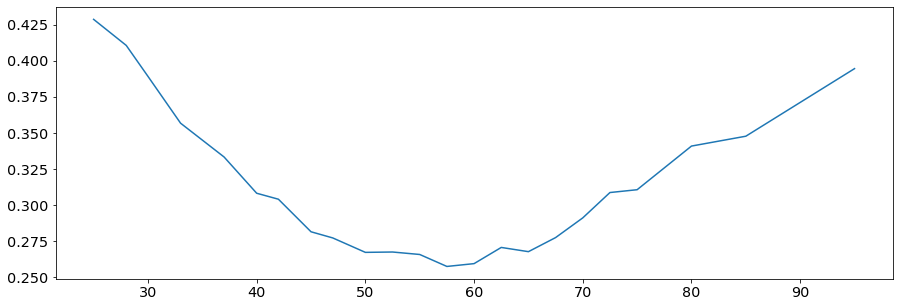

In [62]:
# Choose interesting strikes values: MARKET PRICES - CSCO
call_CSCO_strikes = df_market_call_csco['strike']
market_call_CSCO_impliedVolatility = df_market_call_csco['impliedVolatility']
market_call_CSCO_lastPrice = df_market_call_csco['lastPrice']

call_CSCO_strikes = np.array(call_CSCO_strikes)
call_CSCO_strikes = call_CSCO_strikes[2:]
market_call_CSCO_impliedVolatility = np.array(market_call_CSCO_impliedVolatility)
market_call_CSCO_impliedVolatility = market_call_CSCO_impliedVolatility[2:]
market_call_CSCO_lastPrice = np.array(market_call_CSCO_lastPrice)
market_call_CSCO_lastPrice = market_call_CSCO_lastPrice[2:]

plt.plot(call_CSCO_strikes,market_call_CSCO_impliedVolatility)

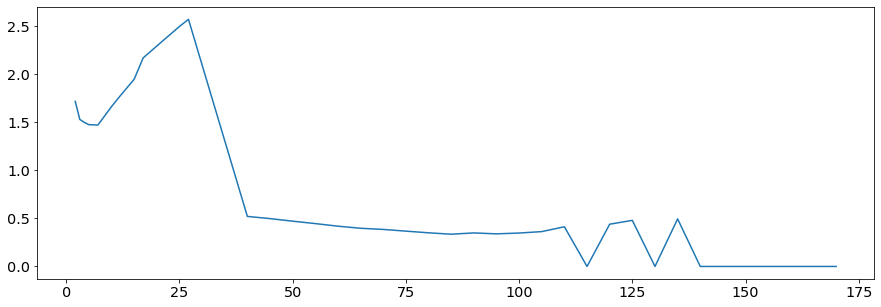

In [35]:
# Choose interesting strikes values: MARKET PRICES - GE
put_GE_strikes = df_market_put_ge['strike']
market_put_GE_impliedVolatility = df_market_put_ge['impliedVolatility']
market_put_GE_lastPrice = df_market_put_ge['lastPrice']

put_GE_strikes = np.array(put_GE_strikes)
market_put_GE_impliedVolatility = np.array(market_put_GE_impliedVolatility)
market_put_GE_lastPrice = np.array(market_put_GE_lastPrice)

plt.plot(put_GE_strikes, market_put_GE_impliedVolatility)

In [36]:
i = complex(0, 1)
# To be used in the Heston pricer
def fHeston(s, St, K, r, T, sigma, kappa, theta, volvol, rho):
    # To be used a lot
    prod = rho * sigma * i * s
    # Calculate d
    d1 = (prod-kappa) ** 2
    d2 = (sigma**2) * (-2 * i * s + s**2)
    d = np.sqrt(d1 + d2)
    # Calculate g
    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1 / g2
    # Calculate first exponential
    exp1 = np.exp(np.log(St) * i * s) * np.exp(i * s * r * T)
    exp2 = 1 - g * np.exp(-d * T)
    exp3 = 1 - g
    mainExp1 = exp1 * np.power(exp2 / exp3, -2 * theta * kappa/ (sigma**2))
    # Calculate second exponential
    exp4 = theta * kappa * T / (sigma**2)
    exp5 = volvol / (sigma**2)
    exp6 = (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
    mainExp2 = np.exp((exp4 * g1) + (exp5 * g1 * exp6))
    return mainExp1 * mainExp2

In [37]:
# Heston Pricer
def priceHestonMid(St, K, r, q, T, sigma, kappa, theta, volvol, rho):
    P, iterations, maxNumber = 0, 1000, 100
    ds = maxNumber / iterations
    element1 = 0.5 * (St * np.exp(-q * T) - K * np.exp(-r * T))
    # Calculate the complex integral
    # Using j instead of i to avoid confusion
    for j in range(1, iterations):
        s1 = ds * (2 * j + 1) / 2
        s2 = s1 - i
        numerator1 = fHeston(s2, St, K, r, T,
                             sigma, kappa, theta, volvol, rho)
        numerator2 = K * fHeston(s1, St, K, r, T,
                               sigma, kappa, theta, volvol, rho)
        denominator = np.exp(np.log(K) * i * s1) * i * s1
        P += ds * (numerator1 - numerator2) / denominator
    element2 = P / np.pi
    return np.real((element1 + element2))

In [100]:
# Test Parameters

S_0_CSCO = 43.32            # stock price: CSCO
S_0_GE = 65.29              # stock price: GE
r = 1.53/100                # interest rate
q_csco = 0.0152             # dividend yield CSCO
q_ge = 0.0032               # dividend yield GE
K_CSCO = 55                 # specific strike CSCO
K_GE = 10                   # specific strike GE
T = 150/250                 # 30 weeks: 150 trading days
N = len(call_CSCO_strikes)

In [123]:
# Annealing calibration function for Call options
def calibratorHestonSA(St, lowerBounds = [1e-2,1e-2,1e-2,1e-2,-1],
                            upperBounds = [10,10,10,10,1]):

    # Note the difference in the objective function (sum of squares vs vector of errors)
    objectiveFunctionHeston = lambda paramVect: np.sum(np.square((market_call_CSCO_lastPrice - priceHestonMid(St, call_CSCO_strikes,
                                                                        r,
                                                                        q_csco,
                                                                        T,
                                                                        paramVect[0],
                                                                        paramVect[1],
                                                                        paramVect[2],
                                                                        paramVect[3],
                                                                        paramVect[4]))/market_call_CSCO_lastPrice))

    # Define the upper and lower bounds
    bounds = list(zip(lowerBounds, upperBounds))

    # Minimize the function
    results = dual_annealing(objectiveFunctionHeston, bounds = bounds)

    return results

calibratorHestonSA(S_0_CSCO)

/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in p

     fun: 118273240.9420039
 message: ['Maximum number of iteration reached']
    nfev: 10889
    nhev: 0
     nit: 1000
    njev: 148
  status: 0
 success: True
       x: array([0.52815911, 9.99965066, 0.01      , 0.09505725, 1.        ])

In [ ]:
def putPriceHestonMid(St, K, r, q, T, call_price):
    return call_price + K * np/exp(-r * T) - St * np/exp(-q * T)

In [130]:
# Annealing calibration function for Put options
def calibratorHestonSAPut(St, lowerBounds = [1e-2,1e-2,1e-2,1e-2,-1],
                            upperBounds = [10,10,10,10,1]):

    # Note the difference in the objective function (sum of squares vs vector of errors)
    objectiveFunctionHestonput = lambda paramVect: np.sum(np.square((market_price_put_ge - priceHestonMid(St, put_GE_strikes,
                                                                        r,
                                                                        q_ge,
                                                                        T,
                                                                        paramVect[0],
                                                                        paramVect[1],
                                                                        paramVect[2],
                                                                        paramVect[3],
                                                                        paramVect[4])- put_GE_strikes * np.exp(-r * T) + St * np.exp(-q_ge * T))/market_price_put_ge))

    # Define the upper and lower bounds
    bounds = list(zip(lowerBounds, upperBounds))

    # Minimize the function
    results = dual_annealing(objectiveFunctionHestonput, bounds = bounds)

    return results

calibratorHestonSAPut(S_0_GE)

/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in p

     fun: 0.0
 message: ['Maximum number of iteration reached']
    nfev: 10013
    nhev: 0
     nit: 1000
    njev: 2
  status: 0
 success: True
       x: array([5.24887965, 6.03366049, 2.71512467, 4.77687905, 0.40739546])

In [113]:
# def cost_function(alpha):
#     list_temp = np.ones(shape=(1,N))
#     for i in range(N):
#         temp = (market_call_CSCO_lastPrice[i] - priceHestonMid(S_0_CSCO, call_CSCO_strikes[i], r, q_csco, T, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4]))**2
#         list_temp[0][i] = temp
#     result = np.sum(list_temp)
#     return result

In [114]:
# x0_CSCO = [0.2, 0.2, 0.2, 0.2, -0.2]
#
# #opt = scipy.optimize.minimize(cost_function, x0_CSCO, method='Nelder-Mead', options={'tol': 1e-6, 'maxiter':1e6})
# opt = scipy.optimize.minimize(cost_function, x0_CSCO, tol=1e-2)
# print(opt.x)

/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-pac

[ 0.2  0.2  0.2  0.2 -0.2]


In [120]:
x0 = [0.4, 0.2, 0.2, 0.2, -0.2]
A = np.zeros(shape=(N,5))
bnds = ((1e-2,2),(1e-2,1),(1e-2,1),(1e-2,1),(-1,1))
for i in range(N):
    print(i)
    obj_CSCO = lambda alpha :(market_call_CSCO_lastPrice[i] - priceHestonMid(S_0_CSCO, call_CSCO_strikes[i], r, q_csco, T, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4]))**2
    opt = scipy.optimize.minimize(obj_CSCO, x0, method='Nelder-Mead',bounds=bnds, tol=1e-2)
    print(opt.x)
    A[i]=opt.x
print(A)

0


/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


[ 0.4  0.2  0.2  0.2 -0.2]
1


/Users/z.scialom/Documents/IIT_courses_SPRING/MATH584_Algo_Trading/PyCharm_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


KeyboardInterrupt: 